<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Feature Selection</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Change](#add)
2. [Change](#add)

In [5]:
import pandas as pd
import numpy as np

# Import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

# Encoder 
from sklearn.preprocessing import OrdinalEncoder

# Standard scaler
from sklearn.preprocessing import StandardScaler

import warnings

# Clustering
from minisom import MiniSom

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

#################### remove all imports that are not being used in the notebook ####################

In [6]:
df = pd.read_csv('df2.csv') #, index_col='customer_id'

In [7]:
df.head()

,Unnamed: 0,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,...,customer_city,total_orders,days_since_last_order,vendor_loyalty_score,cuisine_variety,available_cuisines_city,relative_cuisine_variety,average_spending,order_frequency,chain_consumption
0,0,-1.336914,-0.405124,-0.101535,-0.460631,-1.179582,-2.746186,-0.419982,-0.424012,-0.271954,...,-1.060623,-0.471133,-2.746186,-0.076298,-0.870670,1.151593,-1.080237,0.528089,22.754035,-0.329127
1,1,-1.478066,-0.405124,-0.531991,-0.209876,-1.179582,-2.746186,0.676943,-0.153769,-0.271954,...,1.338483,-0.471133,-2.746186,-0.076298,-0.195411,-1.281334,0.378789,-0.087778,22.754035,0.964013
2,2,1.486128,-0.765813,-0.531991,-0.209876,-1.179582,-2.746186,0.367203,-0.424012,-0.271954,...,-0.260921,-0.471133,-2.746186,1.472881,-0.870670,0.108910,-0.947598,-0.725299,22.754035,0.964013
3,3,-0.207697,-0.405124,-0.388506,-0.460631,-1.179582,-2.702571,-0.419982,0.155382,-0.271954,...,-0.260921,-0.471133,-2.702571,-0.076298,-0.195411,0.108910,-0.284404,0.698774,10.938078,-0.329127
4,4,-1.054610,-0.405124,-0.101535,-0.711387,-1.179582,-2.702571,0.826679,1.304442,-0.271954,...,-0.260921,-0.471133,-2.702571,-0.076298,-0.195411,0.108910,-0.284404,2.219652,10.938078,-1.622266


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_23']

# calculate the total number of orders for different times of the day
dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())  # Sum of orders from 12 AM to 6 AM
morning = sum(df.loc[:, 'HR_7':'HR_12'].sum())  # Sum of orders from 7 AM to 12 PM
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())  # Sum of orders from 1 PM to 6 PM
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())  # Sum of orders from 7 PM to 11 PM

# organize total orders for each time of the day in a list
orders_per_moment_of_day = [dawn, morning, afternoon, night]

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# calculate the sum of orders for each day of the week
orders_per_dow_sum = orders_per_dow.sum()

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']

# calculate the sum of the amount spent for each cuisine type
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [10]:
df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'customer_city', 'total_orders', 'days_since_last_order',
       'vendor_loyalty_score', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_variety', 'average_spending', 'order_frequency',
       'chain_consumption'],
      dtype='object')

**<span style="color: red;">Why are we loosing features?</span>**

# Correlation Matrix

In [11]:
columns_to_drop = list(orders_per_hour.columns) + list(orders_per_dow.columns) + list(amount_spent_per_cuisine.columns)
df_corr = df.drop(columns_to_drop, axis=1)

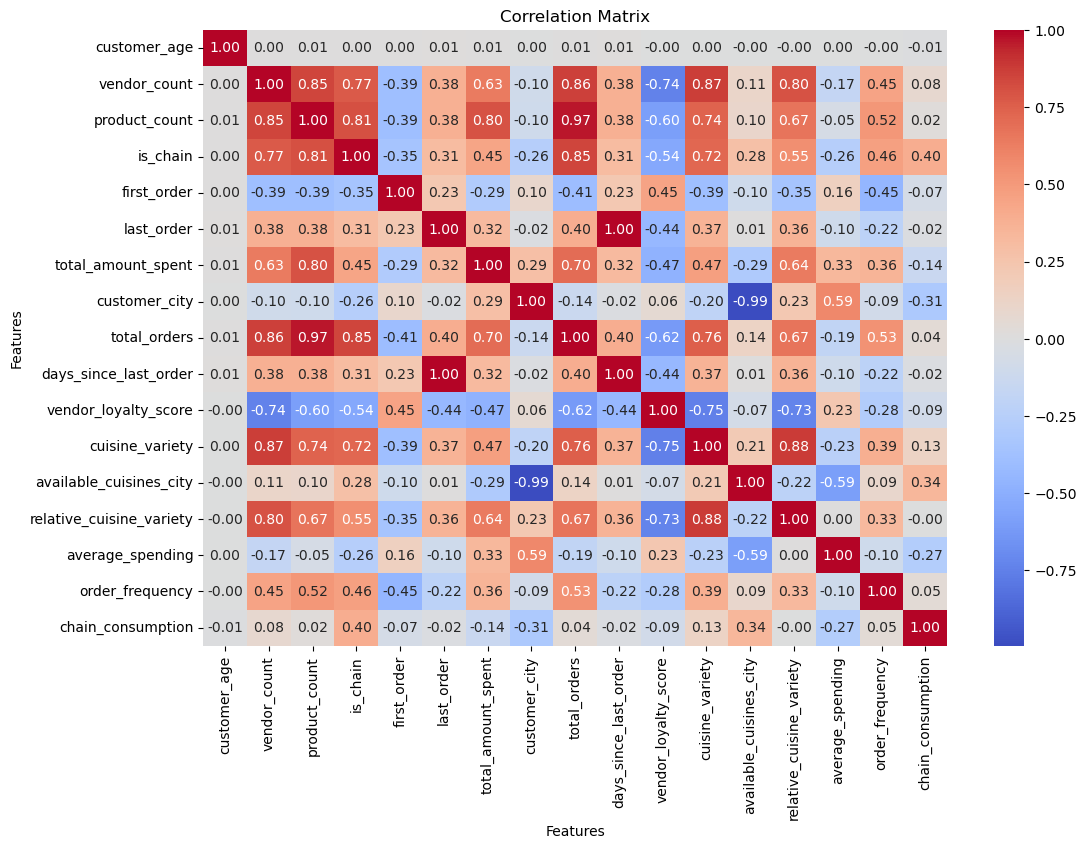

In [12]:
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

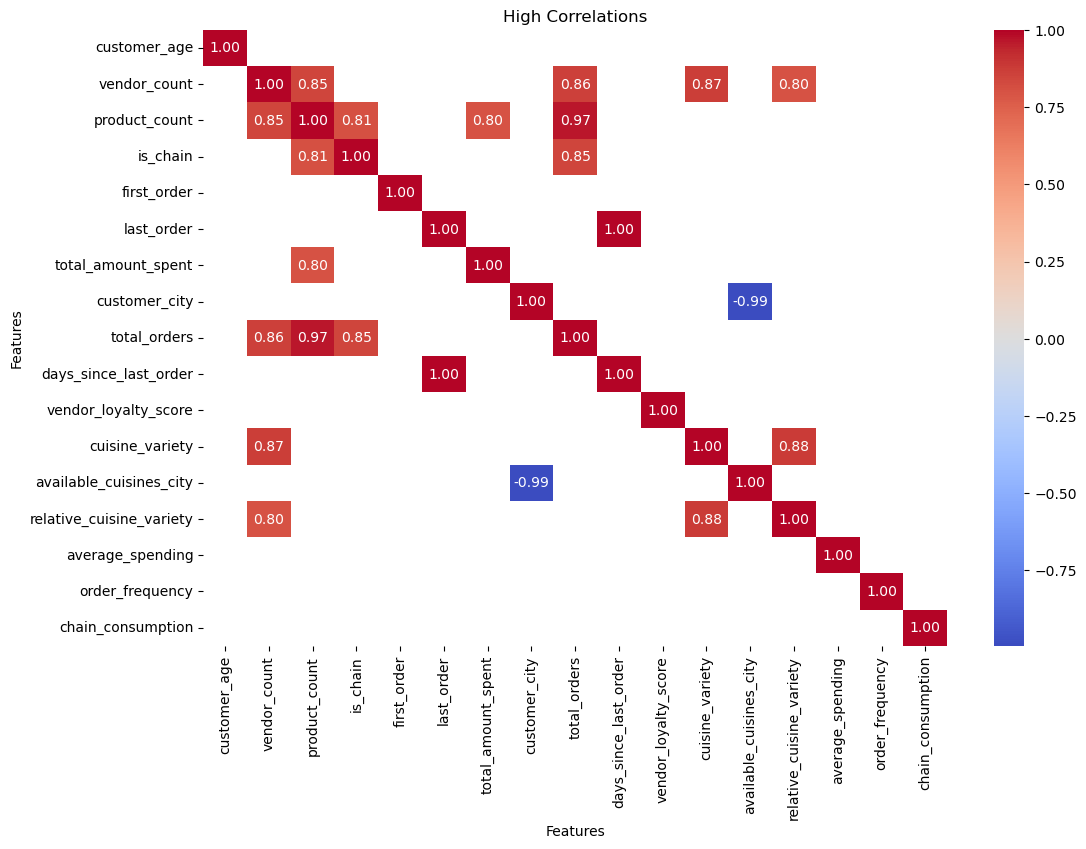

In [13]:
# Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Filter the correlations above 0.8
high_corr_matrix = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with only high correlations
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=high_corr_matrix.isna())

# Adding titles and labels
plt.title('High Correlations')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [14]:
df_corr.drop(['vendor_count', 'product_count', 'is_chain', 'last_order', 'cuisine_variety', 'customer_city'], axis=1, inplace=True)

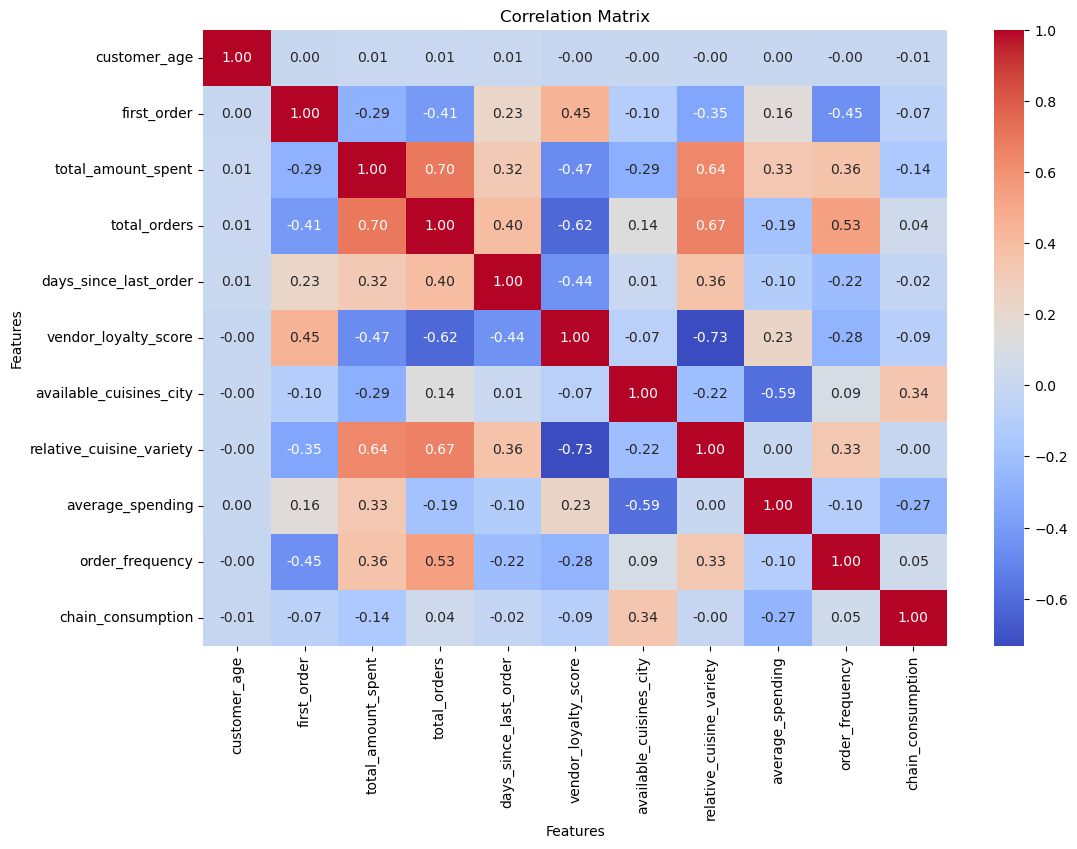

In [15]:
correlation_matrix = df_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [16]:
df_corr.columns

Index(['customer_age', 'first_order', 'total_amount_spent', 'total_orders',
       'days_since_last_order', 'vendor_loyalty_score',
       'available_cuisines_city', 'relative_cuisine_variety',
       'average_spending', 'order_frequency', 'chain_consumption'],
      dtype='object')

# Perspectives

**Preferential** - vendor_loyalty_score, relative_cuisine_variety, chain_consumption

**Behavioral** - first_order, days_since_last_order, order_frequency, total_orders, total_amount_spent, average_spending

In [17]:
preferences = df[['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']]

behaviors = df[['first_order', 'days_since_last_order', 'order_frequency', 'total_orders', 
                'total_amount_spent', 'average_spending']]

## Self-Organizing Maps

### Preferential Perspective

In [21]:
# deciding the grid size for the SOM
grid_size = 5 * (preferences.shape[0] ** 0.5)

print(f'The product of M and N should be close to {round(grid_size,2)}')
print(f'Thus M and N should be close to {round(grid_size ** 0.5,2)}')

The product of M and N should be close to 886.02
Thus M and N should be close to 29.77


In [26]:
M = 30
N = 30
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(preferences.columns)
learning_rate = 0.3 # the learning rate value was chosen by experimenting and comparing QE and TE values


som_data = preferences.values

sm = MiniSom(M, N,              
             n_feats,          
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

Before training:
QE 0.0337
TE 0.964
After training:
QE 0.0231
TE 0.1166


In [27]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(30, 30, 3)

In [28]:
# For numerical computations
import numpy as np

# For creating hexagons
from matplotlib.patches import RegularPolygon

# For plotting
import matplotlib.pyplot as plt
from matplotlib import cm  # For colormap handling

# For adding colorbars
from matplotlib.colorbar import Colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False       
                  ):

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='x-small')


    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf 

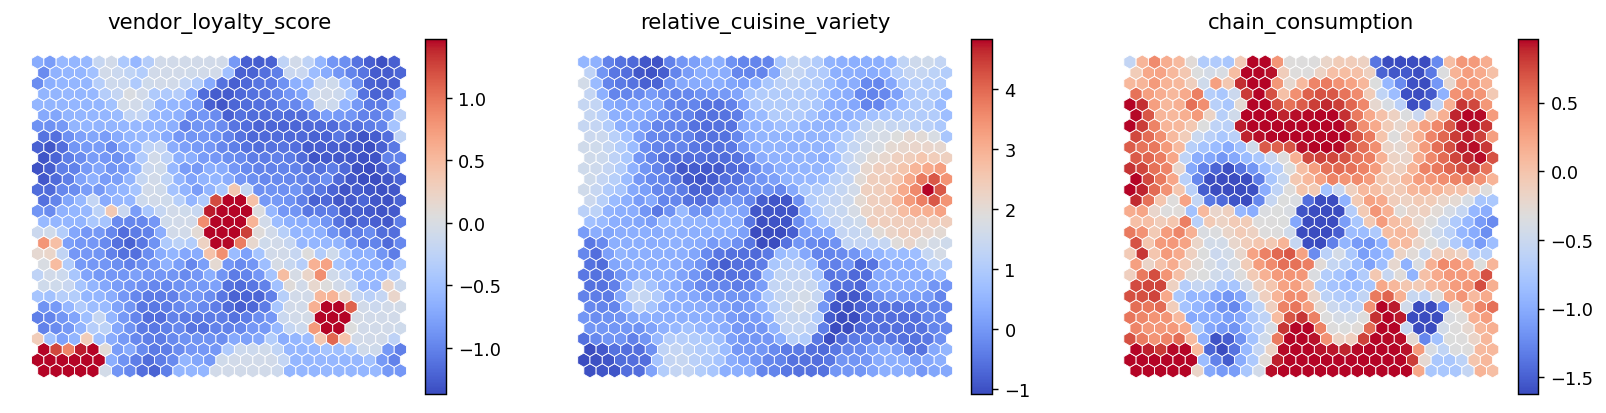

In [35]:
import matplotlib.colors as mpl_colors
from matplotlib import colorbar
    
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(1, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(preferences.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)

    sf = plot_hexagons(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=preferences.columns[cpi],
        cmap=cm.coolwarm,
    )

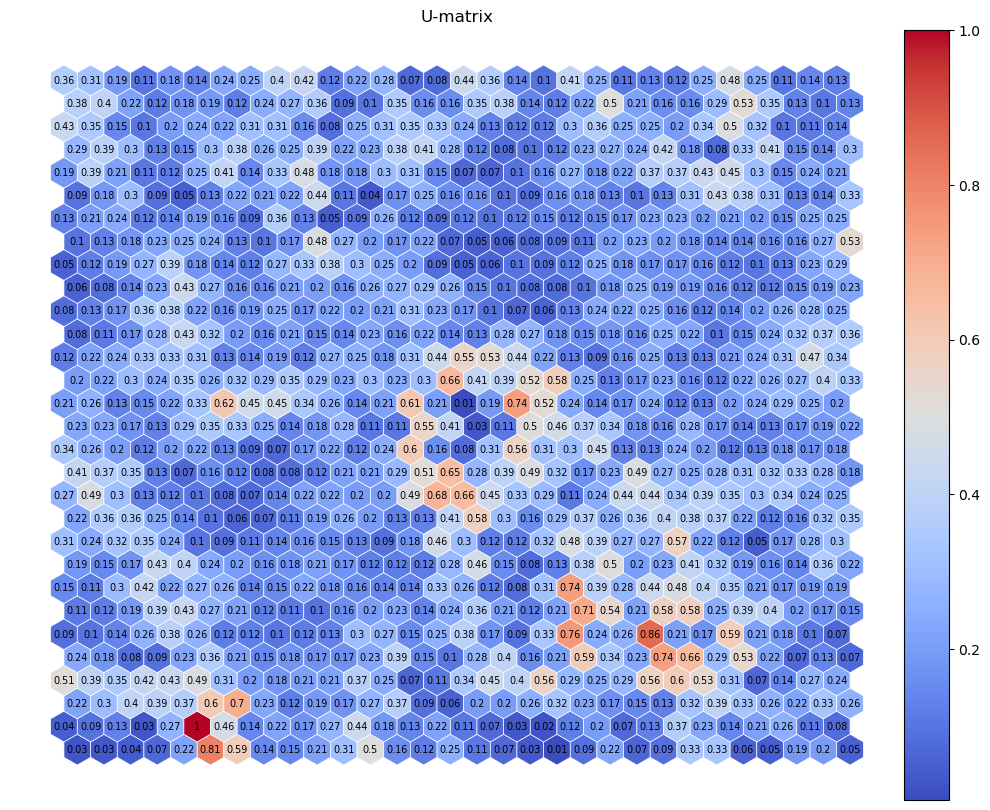

In [47]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,10))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="U-matrix",
                    cmap=cm.coolwarm,
                    annot=True
                    )

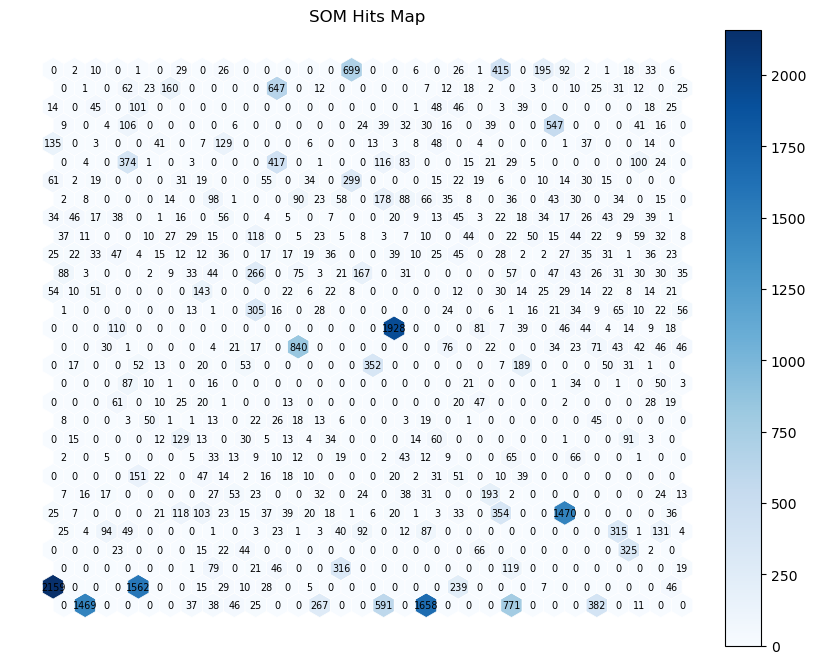

In [46]:
hitsmatrix = sm.activation_response(preferences.values)


fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="SOM Hits Map",
                    cmap=cm.Blues,
                    annot=True
                    )

### Behavioral Perspective

In [ ]:
M = 30
N = 30
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(preferences.columns)
learning_rate = 0.3 # the learning rate value was chosen by experimenting and comparing QE and TE values


som_data = preferences.values

sm = MiniSom(M, N,              
             n_feats,          
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

Before training:
QE 0.0337
TE 0.964
After training:
QE 0.0231
TE 0.1166


In [ ]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(30, 30, 3)

In [ ]:
# For numerical computations
import numpy as np

# For creating hexagons
from matplotlib.patches import RegularPolygon

# For plotting
import matplotlib.pyplot as plt
from matplotlib import cm  # For colormap handling

# For adding colorbars
from matplotlib.colorbar import Colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False       
                  ):

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='x-small')


    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf 

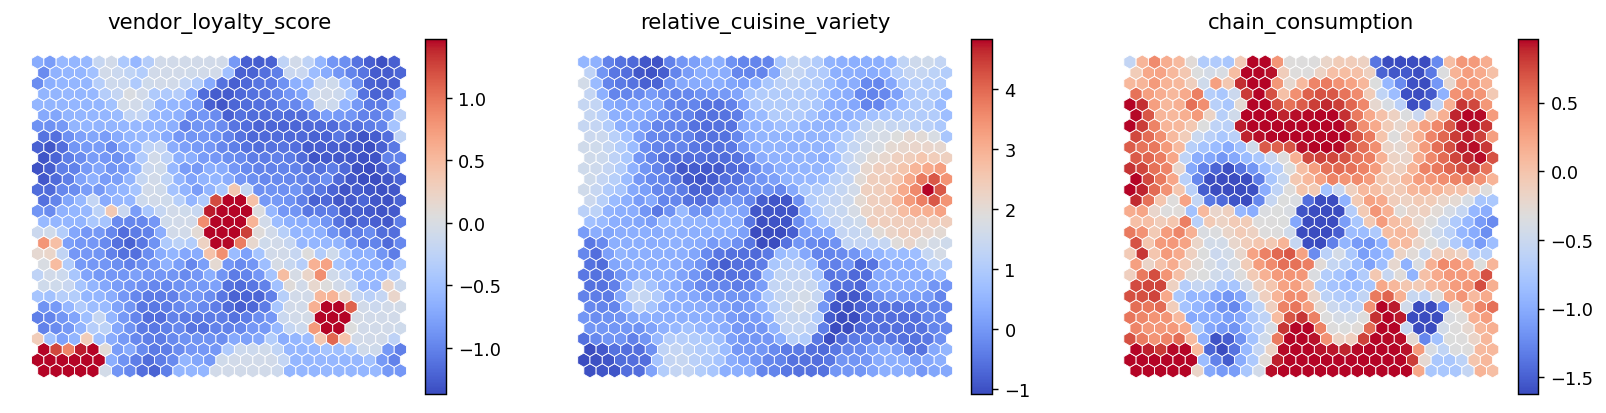

In [ ]:
import matplotlib.colors as mpl_colors
from matplotlib import colorbar
    
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(1, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(preferences.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)

    sf = plot_hexagons(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=preferences.columns[cpi],
        cmap=cm.coolwarm,
    )

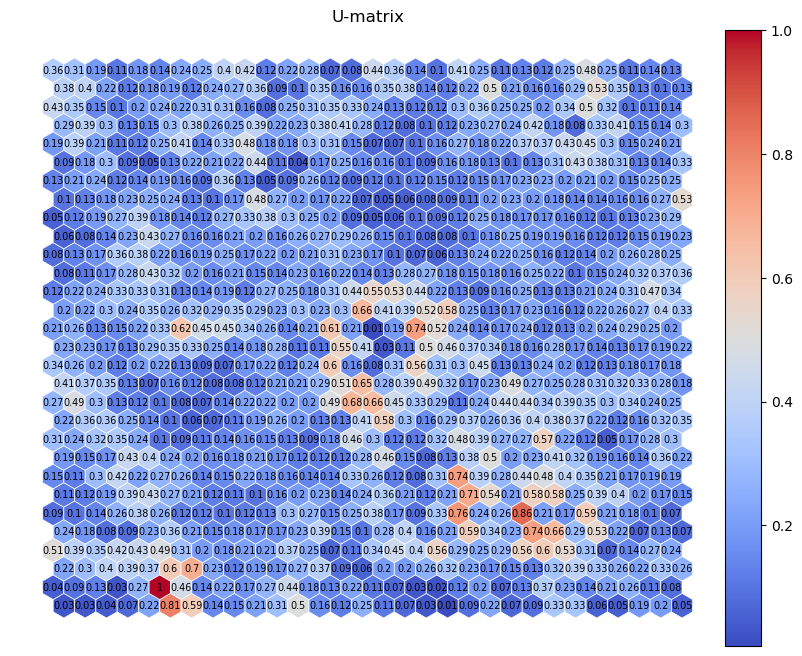

In [ ]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="U-matrix",
                    cmap=cm.coolwarm,
                    annot=True
                    )

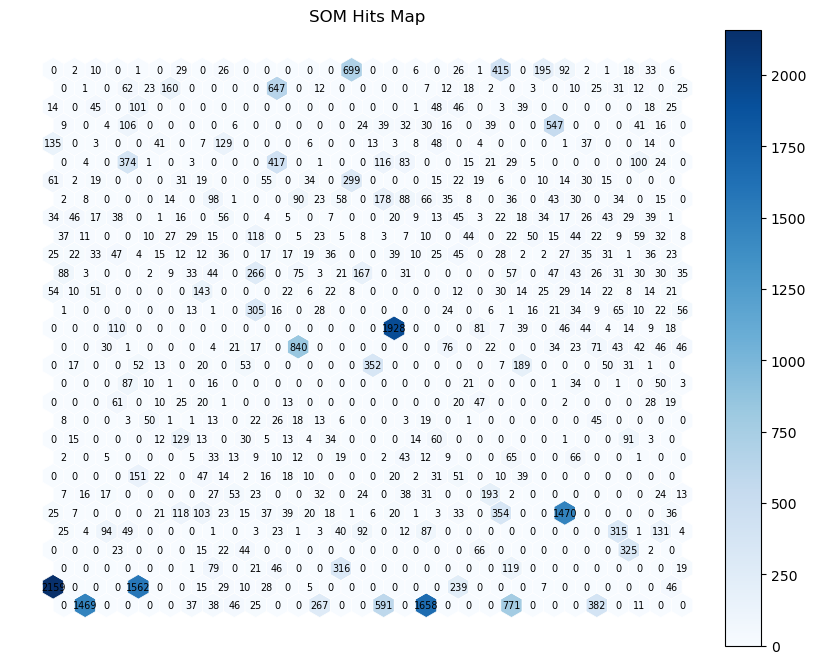

In [ ]:
hitsmatrix = sm.activation_response(preferences.values)


fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="SOM Hits Map",
                    cmap=cm.Blues,
                    annot=True
                    )

### K-Means

In [ ]:
used_features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption', 
                 'first_order', 'days_since_last_order', 'order_frequency', 'total_orders', 
                 'total_amount_spent', 'average_spending']

In [ ]:
kmclust = KMeans(n_clusters=8, init='random', n_init=9, random_state=1)

In [ ]:
kmclust.fit(df[used_features])

KMeans(init='random', n_init=9, random_state=1)

In [ ]:
kmclust.predict(df[used_features])

array([7, 7, 7, ..., 4, 6, 6], dtype=int32)

In [ ]:
pd.DataFrame(kmclust.transform(df[used_features]))

,0,1,2,3,4,5,6,7
0,22.345243,23.233201,23.126744,22.617756,23.632062,23.520353,23.708885,15.689828
1,22.231914,23.245691,23.056564,22.627105,23.762214,23.649796,23.692186,15.710633
2,22.519983,23.392114,23.165341,22.612104,23.721182,23.728940,23.672565,15.714321
3,11.120089,11.639014,11.582209,10.887424,12.151018,11.993947,12.270219,3.999900
4,11.363811,11.828174,12.042440,11.281284,12.262634,11.825615,12.677716,4.868915
...,...,...,...,...,...,...,...,...
31396,6.704280,4.507920,4.135410,4.491139,3.493334,5.325085,1.942714,9.577601
31397,6.701249,4.503358,4.133426,4.488005,3.487949,5.313499,1.935987,9.575885
31398,6.754954,4.211065,5.140121,5.043705,2.404423,3.326181,3.443820,9.753033
31399,6.596955,4.380172,4.538104,4.658705,3.468224,3.508448,2.385703,9.609927


In [ ]:
kmclust = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df[used_features])

KMeans(n_init=15, random_state=1)

In [ ]:
range_clusters = range(1, 10)

In [ ]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df[used_features])
    inertia.append(kmclust.inertia_) 

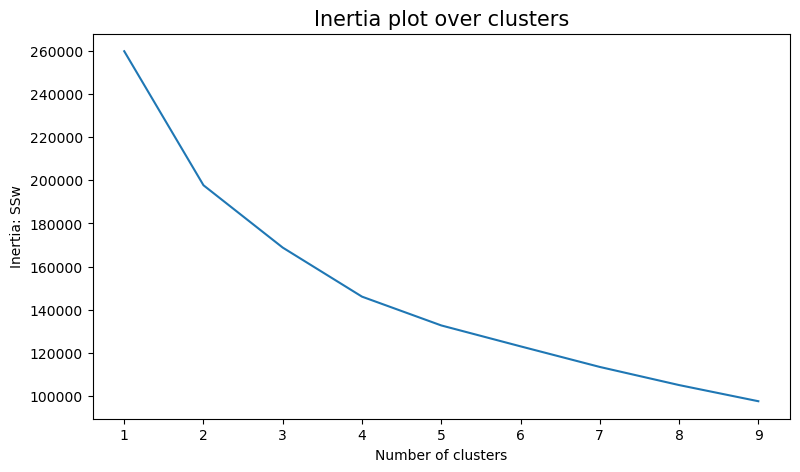

In [ ]:
# The inertia plot

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.23197985213066072
For n_clusters = 3, the average silhouette_score is : 0.2223366639642961
For n_clusters = 4, the average silhouette_score is : 0.21874055110752522
For n_clusters = 5, the average silhouette_score is : 0.20998302005804392
For n_clusters = 6, the average silhouette_score is : 0.21207533632026385
For n_clusters = 7, the average silhouette_score is : 0.21725935992616333
For n_clusters = 8, the average silhouette_score is : 0.2006498126008486
For n_clusters = 9, the average silhouette_score is : 0.20606034302755977


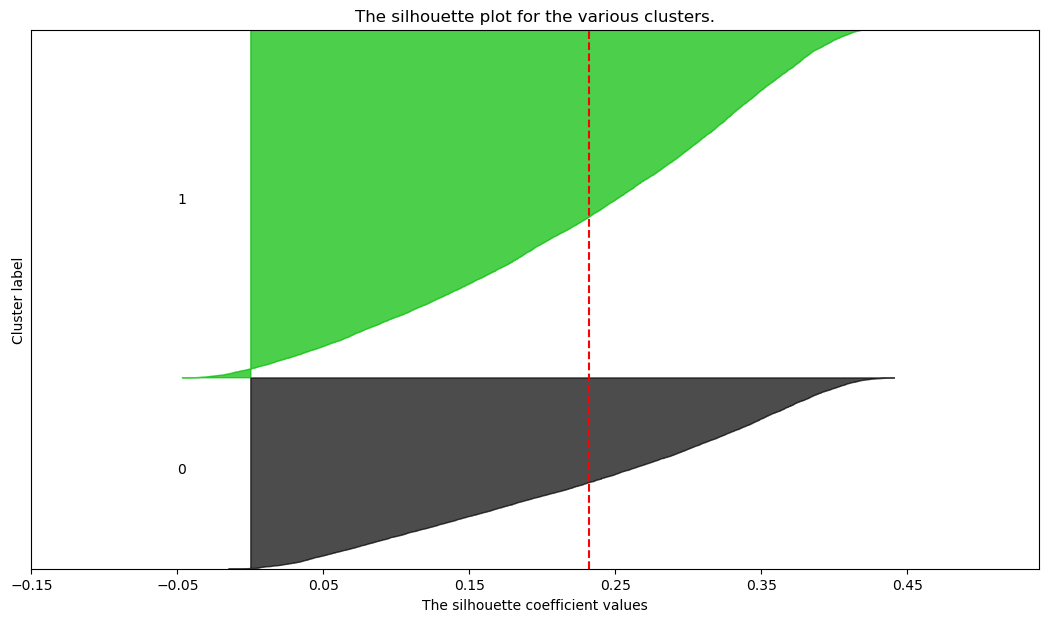

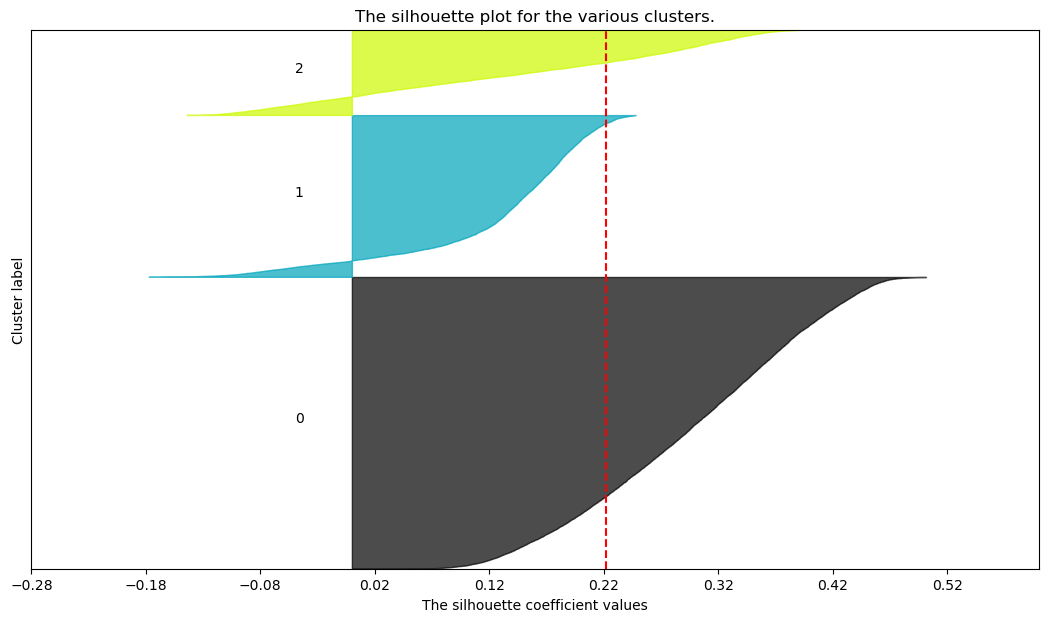

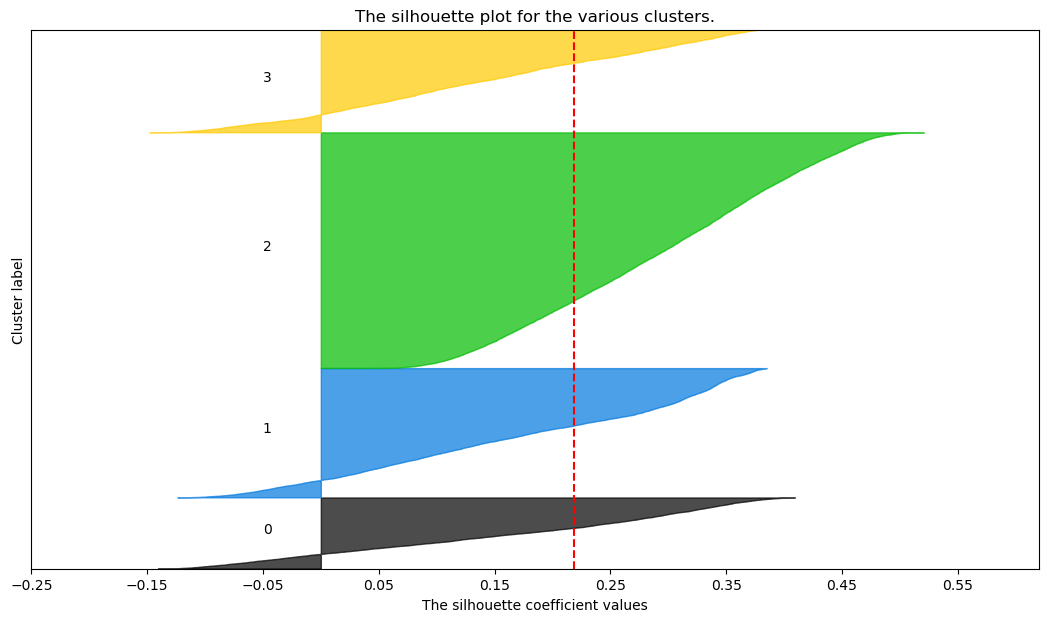

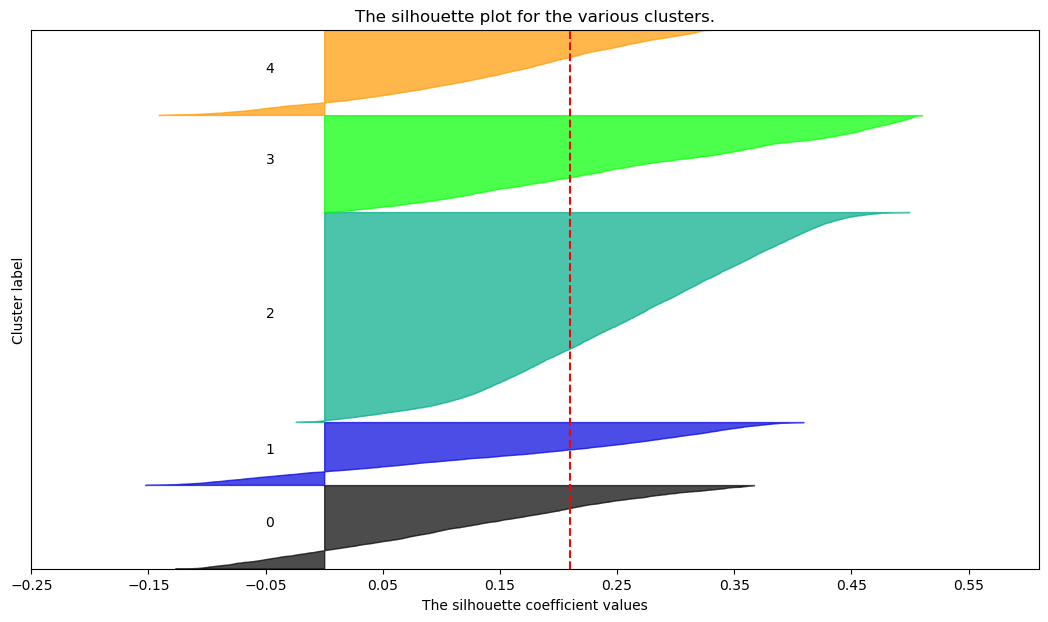

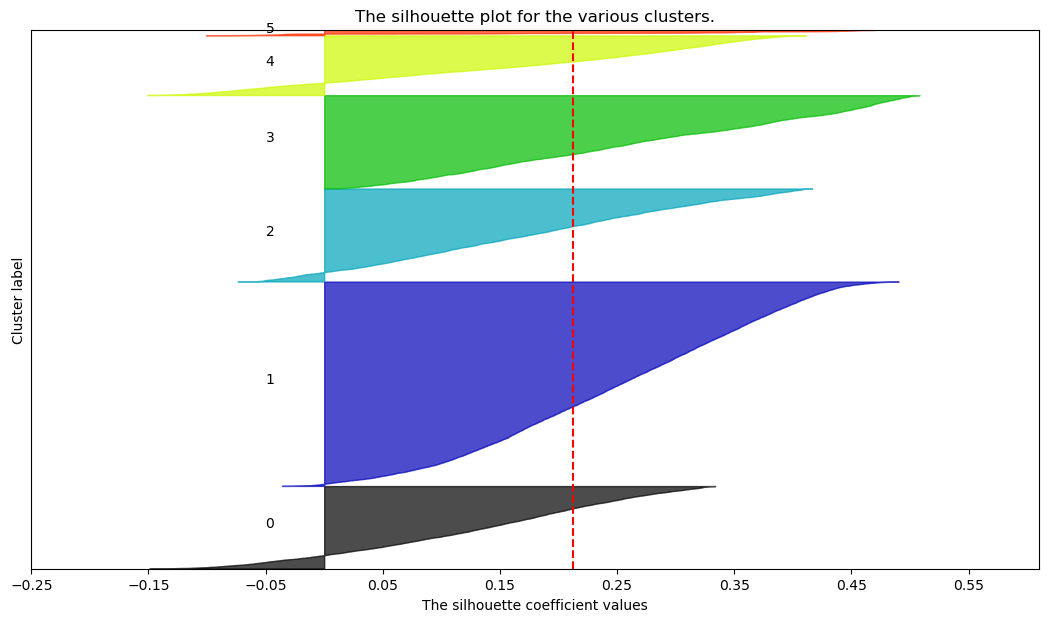

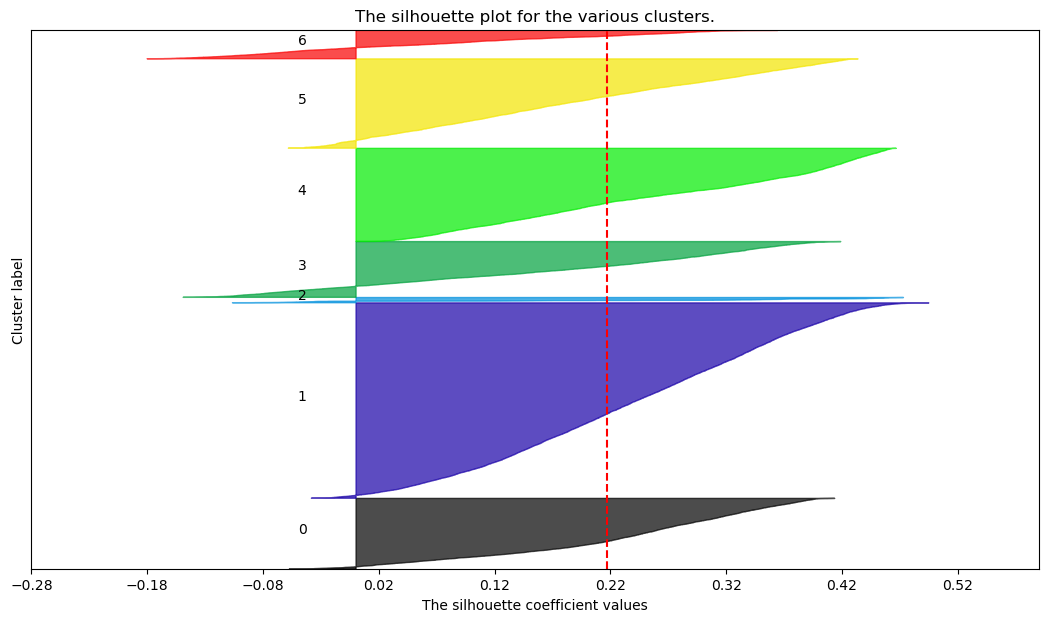

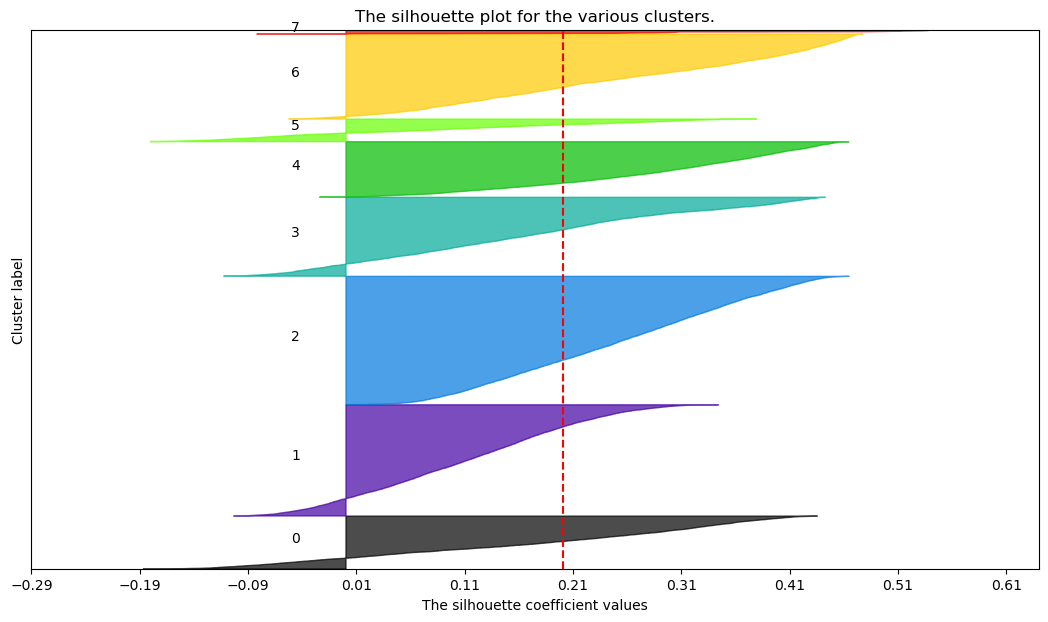

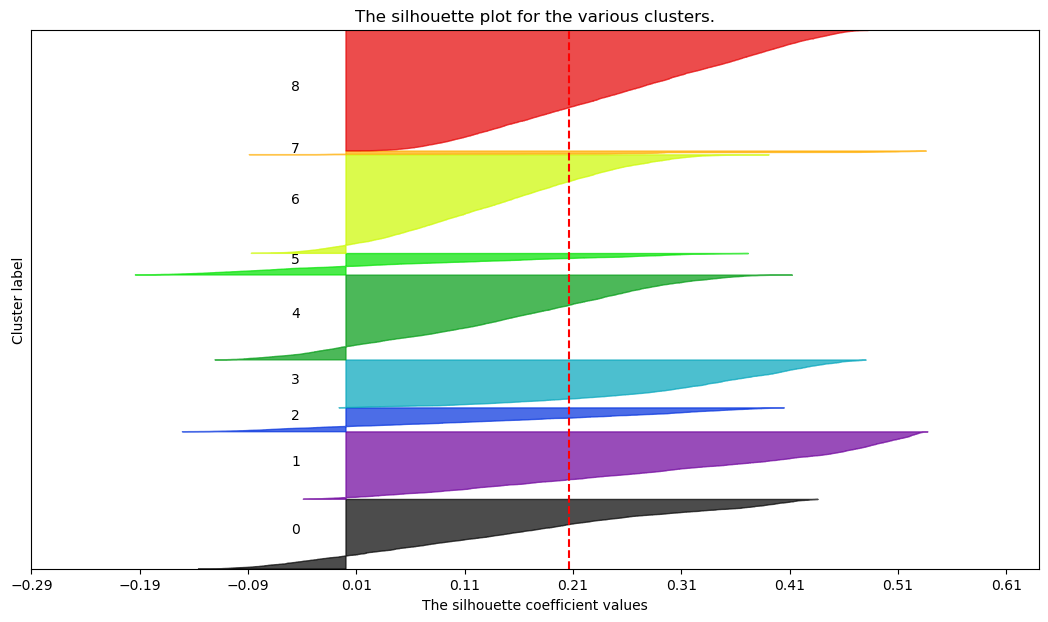

In [ ]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[used_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[used_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[used_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[used_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

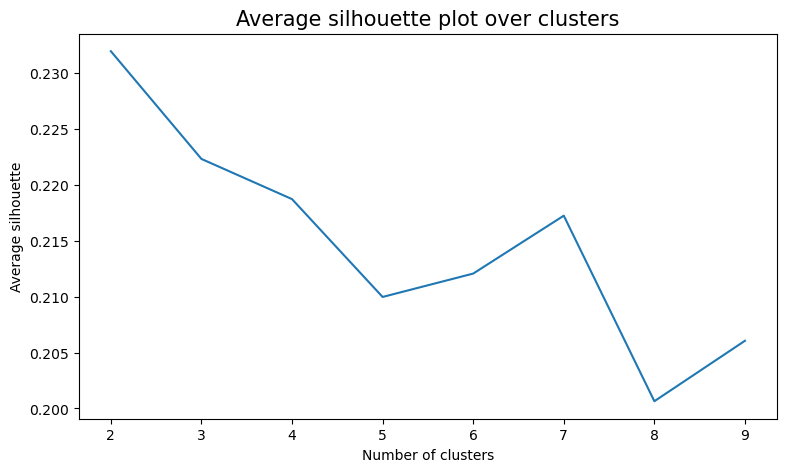

In [ ]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))


#  Why range_clusters[1:] ? 
# Remember we skipped k=1 in the cell above

plt.plot(range_clusters[1:], ## Plot X-axis; 
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [ ]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df[used_features])
km_labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Characterizing the final clusters
df_concat = pd.concat((df[used_features], pd.Series(km_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,vendor_loyalty_score,relative_cuisine_variety,chain_consumption,first_order,days_since_last_order,order_frequency,total_orders,total_amount_spent,average_spending
labels,,,,,,,,,
0,-0.430014,-0.001272,0.112068,-0.128827,0.117272,-0.157453,-0.145814,-0.216411,-0.247011
1,1.367445,-0.839749,-0.181004,0.648698,-0.555204,-0.337513,-0.580777,-0.426116,0.435551
2,-1.080881,1.519897,-0.039273,-0.754731,0.617936,1.022771,1.360976,1.347392,0.025134


### Merging Perspectives